### Importing Libraries

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

### Importing Dataset

In [3]:
df = pd.read_csv('stud.csv')

In [4]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Preparing X and Y

In [5]:
X = df.drop(columns=['math_score'], axis=1)
y= df['math_score']

In [6]:
X.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [7]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

### Transforming Data : Numerical & Categorical

In [10]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

numerical_transformer = StandardScaler()
onehot_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",onehot_transformer, cat_features),
        ("StandardScaler",numerical_transformer, num_features),
    ]
)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [12]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [15]:
X_train.shape, X_test.shape

((800, 19), (200, 19))

#### Create an Evaluate Function to give all metric after model trainng

In [16]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [31]:
models = {
    "Linear Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "K-Neighbors Regressor":KNeighborsRegressor(),
    "Decision Tree Regressor":DecisionTreeRegressor(),
    "Random Forest Regrssor":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "AdaBoost Regressor":AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Performance for Train Set')
    print("- Root Mean Square : {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error : {:.4f}".format(model_train_mae))
    print("- R2 Score : {:.4f}".format(model_train_r2))

    print('-'*23)

    print('Model Performance for Test Set')
    print("- Root Mean Square : {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error : {:.4f}".format(model_test_mae))
    print("- R2 Score : {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*23)
    print('\n')  



Linear Regression
Model Performance for Train Set
- Root Mean Square : 5.3231
- Mean Absolute Error : 4.2667
- R2 Score : 0.8743
-----------------------
Model Performance for Test Set
- Root Mean Square : 5.3940
- Mean Absolute Error : 4.2148
- R2 Score : 0.8804


Lasso
Model Performance for Train Set
- Root Mean Square : 6.5925
- Mean Absolute Error : 5.2053
- R2 Score : 0.8072
-----------------------
Model Performance for Test Set
- Root Mean Square : 6.5173
- Mean Absolute Error : 5.1557
- R2 Score : 0.8254


Ridge
Model Performance for Train Set
- Root Mean Square : 5.3233
- Mean Absolute Error : 4.2650
- R2 Score : 0.8743
-----------------------
Model Performance for Test Set
- Root Mean Square : 5.3904
- Mean Absolute Error : 4.2111
- R2 Score : 0.8806


K-Neighbors Regressor
Model Performance for Train Set
- Root Mean Square : 5.7045
- Mean Absolute Error : 4.5105
- R2 Score : 0.8557
-----------------------
Model Performance for Test Set
- Root Mean Square : 7.2172
- Mean Absolu

In [32]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name','R2_Score']).sort_values(by=['R2_Score'], ascending=False)

,Model Name,R2_Score
2,Ridge,0.880592
0,Linear Regression,0.880433
5,Random Forest Regrssor,0.852480
7,AdaBoost Regressor,0.847424
6,XGBRegressor,0.827797
1,Lasso,0.825446
3,K-Neighbors Regressor,0.785944
4,Decision Tree Regressor,0.735369


### Linear Regression

In [33]:
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
score = r2_score(y_test, y_pred)
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 0.88


### Plot y_test and y_pred

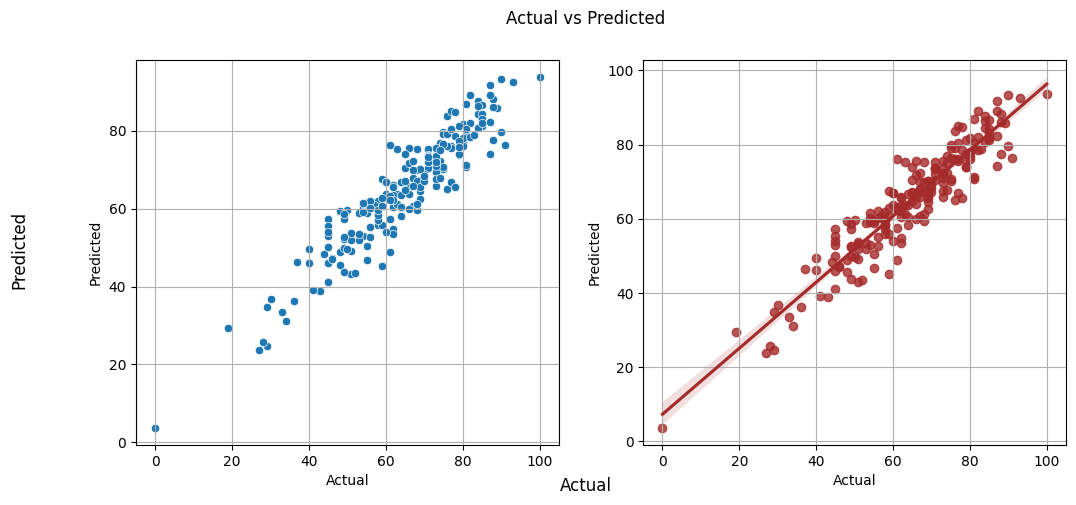

In [43]:
fig, axes = plt.subplots(1,2, figsize=(12,5))
fig.suptitle('Actual vs Predicted')
fig.supxlabel('Actual')
fig.supylabel('Predicted')

sns.scatterplot(x=y_test, y=y_pred, ax=axes[0])
axes[0].set_xlabel('Actual')
axes[0].set_ylabel('Predicted')
axes[0].grid('True')

sns.regplot(x=y_test, y=y_pred, ax=axes[1], color='brown')
axes[1].set_xlabel('Actual')
axes[1].set_ylabel('Predicted')
axes[1].grid('True')

plt.show()

### Difference between Actual and Predicted



In [45]:
pred_df = pd.DataFrame({'Actual_Value':y_test, 'Predicted_Value':y_pred,'Difference':y_test-y_pred})

In [46]:
pred_df.sample(6)

,Actual_Value,Predicted_Value,Difference
499,76,83.739862,-7.739862
595,56,62.039493,-6.039493
917,44,48.243984,-4.243984
261,79,81.165022,-2.165022
312,67,67.971760,-0.971760
371,45,57.380744,-12.380744
